Criando uma classe Cards, que recebe como atributos naipe e valor da carta. Se nada for passado, cria por padrão um dois de paus, seguindo a codificação a seguir:<br>
Spades -> 3<br>
Hearts -> 2<br>
Diamonds -> 1<br>
Clubs -> 0<br>

O rank é mais simples, com carta mapeando para seu próprio valor (ex: 2 de paus tem o rank = 2)

In [4]:
class Card:
    
    # Class variables (class attributes) - these are shared by all instances of the class and are not tied to any specific instance.
    # They are defined directly within the class body.
    suit_names = {0: 'Clubs', 1: 'Diamonds', 2: 'Hearts', 3: 'Spades'}
    rank_names = {1: 'Ace', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: 'Jack', 12: 'Queen', 13: 'King'}
    
    def __init__(self, suit = 0, rank = 2):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        return f"{Card.rank_names.get(self.rank)} of {Card.suit_names.get(self.suit)}" # to access class variables, we use the class name (Card) instead of self.

    def __lt__(self, other):
        return (self.suit, self.rank) < (other.suit, other.rank) # less than operator for comparison

    def __gt__(self, other):
        return (self.suit, self.rank) > (other.suit, other.rank) # greater than operator for comparison

    def __eq__(self, other):
        return (self.suit, self.rank) == (other.suit, other.rank) # equality operator for comparison

two_of_clubs = Card()
queen_of_hearts = Card(2, 12)
print(f'Two of clubs: {two_of_clubs}\nQueen of hearts: {queen_of_hearts}\n')
print(f'Two of clubs < Queen of hearts: {two_of_clubs < queen_of_hearts}\n')
print(f'Two of clubs > Queen of hearts: {two_of_clubs > queen_of_hearts}\n')
print(f'Two of clubs == Queen of hearts: {two_of_clubs == queen_of_hearts}\n')

Two of clubs: 2 of Clubs
Queen of hearts: Queen of Hearts

Two of clubs < Queen of hearts: True

Two of clubs > Queen of hearts: False

Two of clubs == Queen of hearts: False



##### Criação de uma classe Deck (baralho)

In [5]:
import random

class Deck:

    def __init__(self):
        self.cards = [Card(suit, rank) for suit in range(4) for rank in range(1, 14)] # using list comprehension to create a deck of cards with Card class constructor

    def __str__(self):
        cards_str = [str(card) for card in self.cards]
        
        return '\n'.join(cards_str) # print each card in the deck on a new line

    def pop_card(self) -> Card:
        return self.cards.pop() # remove the last card from the deck and return it

    def add_card(self, card) -> None:
        self.cards.append(card) # add a card to the deck

    def shuffle_cards(self) -> None:
        random.shuffle(self.cards) # shuffle the deck of cards

    def sort_cards(self) -> None:
        self.cards.sort()

deck = Deck()

deck.pop_card() # remove the last card from the deck
# print(deck)

deck.add_card(Card(3, 12)) # add a new card to the deck
deck.shuffle_cards()
# deck.sort_cards()
print(deck)

4 of Spades
2 of Clubs
Queen of Spades
Jack of Clubs
7 of Spades
2 of Diamonds
Queen of Spades
6 of Spades
5 of Diamonds
Queen of Clubs
6 of Diamonds
5 of Spades
7 of Clubs
5 of Clubs
4 of Diamonds
10 of Hearts
10 of Clubs
8 of Clubs
Jack of Hearts
6 of Clubs
8 of Hearts
10 of Diamonds
6 of Hearts
2 of Spades
Jack of Diamonds
9 of Diamonds
5 of Hearts
Ace of Diamonds
King of Diamonds
Ace of Clubs
Ace of Hearts
4 of Clubs
King of Hearts
3 of Diamonds
9 of Hearts
7 of Hearts
2 of Hearts
4 of Hearts
10 of Spades
Queen of Diamonds
Ace of Spades
9 of Spades
9 of Clubs
7 of Diamonds
3 of Clubs
3 of Spades
8 of Diamonds
King of Clubs
Queen of Hearts
8 of Spades
Jack of Spades
3 of Hearts


Agora, iremos criar uma classe Hand. O objeto Hand é semelhante ao objeto Deck, pois representam uma coleção de cartas e ambos contam com operações de adição e remoção de cartas. No entanto, existem operações que fazem sentido para um deles e não para o outro.<br>
Nestes contextos, pode ser interessante trabalharmos com heranças de classes

In [6]:
class Hand(Deck):
    def __init__(self, label = ''):
        self.cards = [] # initialize an empty list of cards for the hand
        self.label = label # label for the hand (e.g., player name, dealer, etc.)

    def display_cards(self):
        '''Display the cards in the hand.'''
        
        cards_str = [str(card) for card in self.cards]
        
        return '\n'.join(cards_str)
    
    def get_cards(self, deck, num) -> None:
        '''Move num cards from the deck to a hand.'''
        
        try:
            for _ in range(num):
                card = deck.pop_card() # remove the last card from the deck
                self.add_card(card) # add the card to the hand

        except IndexError as e:
            print(f'Error: {e} - Not enough cards in the deck.')

    def clear_hand(self) -> None:
        '''Clear the hand.'''

        self.cards.clear()

hand = Hand('Player 1')

print(f'Hand label: {hand.label}\n')
print(f'Hand cards: {hand.cards}\n') # print the cards in the hand

hand.get_cards(deck, 5) # get 5 cards from the deck
print(f'Hand cards: \n{hand.display_cards()}\n') # print the cards in the hand

Hand label: Player 1

Hand cards: []

Hand cards: 
3 of Hearts
Jack of Spades
8 of Spades
Queen of Hearts
King of Clubs



##### Exercício 18.1
Desenhe o diagrama UML para as classes abaixo

In [7]:
class PingPongParent:
    pass 

class Ping(PingPongParent):
    def __init__(self, pong):
        self.pong = pong

class Pong(PingPongParent):
    def __init__(self, pings=None):

        if pings is None:
            self.pings = []
        
        else:
            self.pings = ping

    def add_ping(self, ping):
        self.pings.append(ping)

pong = Pong()
ping = Ping(pong)
pong.add_ping(ping)

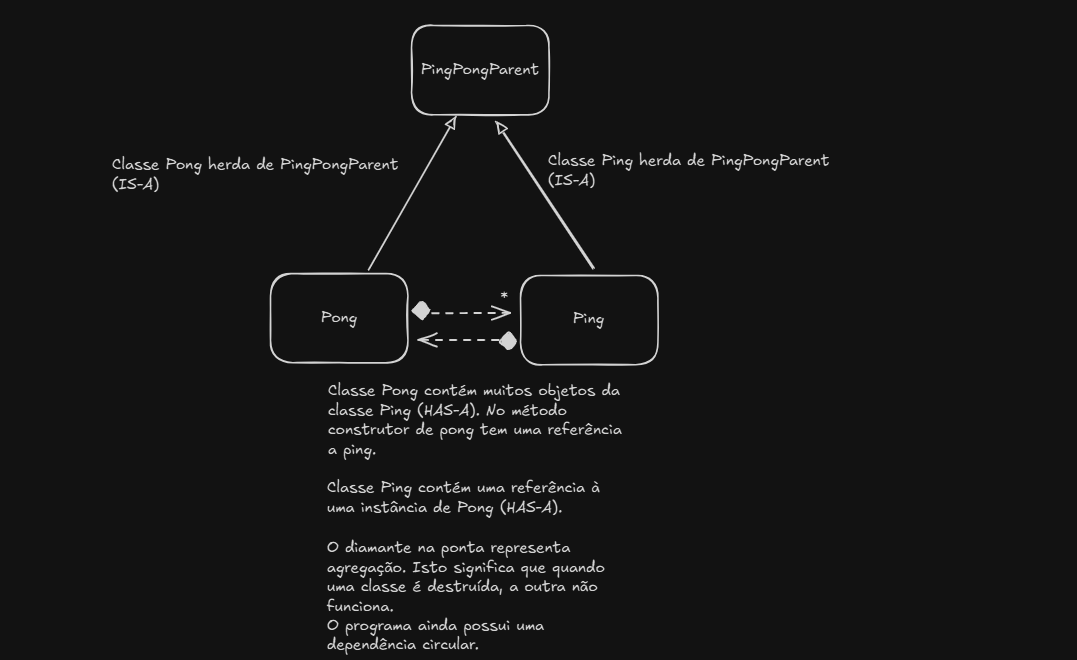

##### Exercício 18.2
Adicione a classe Deck um método deal_hands que receba dois parâmetros: número de mãos e quantidade de cartas por mão. Ele deve criar o número adequado de objetos Hand, lidar com o número adequado de cartas por mão e retornar uma lista de Hands<br>

Pra amanhã: 10/04 - usar um dicionario ao invés de lista. As chaves serão o nome dos jogadores (player 1, player 2 etc). Pra isso q vc importou o defaultdict

Program with lists

In [8]:
import random
from collections import defaultdict

class Deck:

    def __init__(self):
        self.cards = [Card(suit, rank) for suit in range(4) for rank in range(1, 14)] # using list comprehension to create a deck of cards with Card class constructor

    def __str__(self):
        cards_str = [str(card) for card in self.cards]
        
        return '\n'.join(cards_str) # print each card in the deck on a new line

    def pop_card(self) -> Card:
        return self.cards.pop() # remove the last card from the deck and return it

    def add_card(self, card) -> None:
        self.cards.append(card) # add a card to the deck

    def shuffle_cards(self) -> None:
        random.shuffle(self.cards) # shuffle the deck of cards

    def sort_cards(self) -> None:
        self.cards.sort()

    def deal_hands(self, hands: int, cards: int) -> list:
        '''Deal hands of cards from the deck.'''
        
        list_hands = [] # list to store hands
        try:
            for i in range(hands):
                hand = Hand()                # create a new hand
                hand.get_cards(self, cards)  # get cards from the deck and add to the hand
                
                list_hands.append(str(hand)) # add the hand to the list of hands, converting to string to display

        except IndexError as e:
            print(f'Error: {e} - Not enough cards in the deck.')

        else:
            return list_hands

deck = Deck()

# stores the list of hands in a variable
result = deck.deal_hands(hands=2, cards=5)

for hand in result:
    print(f'Hand: \n{hand}') # print each hand in the list of hands



Hand: 
King of Spades
Queen of Spades
Jack of Spades
10 of Spades
9 of Spades
Hand: 
8 of Spades
7 of Spades
6 of Spades
5 of Spades
4 of Spades


improvement: using dict of list instead of list to store hands in deal_hands method

In [9]:
import random
from collections import defaultdict

class Deck:

    def __init__(self):
        self.cards = [Card(suit, rank) for suit in range(4) for rank in range(1, 14)] # using list comprehension to create a deck of cards with Card class constructor

    def __str__(self):
        cards_str = [str(card) for card in self.cards]
        
        return '\n'.join(cards_str) # print each card in the deck on a new line

    def pop_card(self) -> Card:
        return self.cards.pop() # remove the last card from the deck and return it

    def add_card(self, card) -> None:
        self.cards.append(card) # add a card to the deck

    def shuffle_cards(self) -> None:
        random.shuffle(self.cards) # shuffle the deck of cards

    def sort_cards(self) -> None:
        self.cards.sort()

    def deal_hands(self, hands: int, cards: int) -> list | None:
        '''Deal hands of cards from the deck.'''
        
        # list_hands = [] # list to store hands
        dict_hands = defaultdict(list) # using defaultdict to store hands as lists
        
        if hands * cards <= len(self.cards): # check if there are enough cards in the deck
            for i in range(hands):
                hand = Hand()                # create a new hand
                hand.get_cards(self, cards)  # get cards from the deck and add to the hand

                player_cards = str(hand).split('\n') # split the string representation of the hand into a list of cards
                
                dict_hands[f'player_{i + 1}'] = player_cards

            return dict_hands # return the dictionary of hands

        else:
            raise IndexError(f'Not enough cards in the deck to deal {hands} hands of {cards} cards each.')

            
deck = Deck()

# stores the list of hands in a variable
result = deck.deal_hands(hands=5, cards=5)

if isinstance(result, dict):
    for player, hand in result.items():
        print(f'{player} has on hands: {hand}') # print each hand in the list of hands



player_1 has on hands: ['King of Spades', 'Queen of Spades', 'Jack of Spades', '10 of Spades', '9 of Spades']
player_2 has on hands: ['8 of Spades', '7 of Spades', '6 of Spades', '5 of Spades', '4 of Spades']
player_3 has on hands: ['3 of Spades', '2 of Spades', 'Ace of Spades', 'King of Hearts', 'Queen of Hearts']
player_4 has on hands: ['Jack of Hearts', '10 of Hearts', '9 of Hearts', '8 of Hearts', '7 of Hearts']
player_5 has on hands: ['6 of Hearts', '5 of Hearts', '4 of Hearts', '3 of Hearts', '2 of Hearts']


##### 1 - Baixe a versão do autor da classe PokerHand

In [10]:
"""This module contains a code example related to

Think Python, 2nd Edition
by Allen Downey
http://thinkpython2.com

Copyright 2015 Allen Downey

License: http://creativecommons.org/licenses/by/4.0/
"""
from Card import Hand, Deck


class PokerHand(Hand):
    """Represents a poker hand."""

    def suit_hist(self):
        """Builds a histogram of the suits that appear in the hand.

        Stores the result in attribute suits.
        """
        self.suits = {}
        for card in self.cards:
            self.suits[card.suit] = self.suits.get(card.suit, 0) + 1

    def has_flush(self):
        """Returns True if the hand has a flush, False otherwise.
      
        Note that this works correctly for hands with more than 5 cards.
        """
        self.suit_hist()
        for val in self.suits.values():
            if val >= 5:
                return True
        return False


if __name__ == '__main__':
    # make a deck
    deck = Deck()
    deck.shuffle()

    # deal the cards and classify the hands
    for i in range(7):
        hand = PokerHand()
        deck.move_cards(hand, 7)
        hand.sort()
        print(hand)
        print(hand.has_flush())
        print('')


9 of Clubs
2 of Diamonds
8 of Diamonds
10 of Diamonds
2 of Spades
4 of Spades
Jack of Spades
False

4 of Clubs
Queen of Clubs
Ace of Diamonds
King of Diamonds
9 of Hearts
Jack of Hearts
5 of Spades
False

6 of Clubs
10 of Clubs
3 of Diamonds
5 of Diamonds
6 of Hearts
8 of Hearts
9 of Spades
False

7 of Clubs
Jack of Clubs
9 of Diamonds
Jack of Diamonds
10 of Hearts
3 of Spades
7 of Spades
False

Ace of Clubs
8 of Clubs
King of Clubs
2 of Hearts
4 of Hearts
7 of Hearts
King of Spades
False

3 of Clubs
5 of Clubs
6 of Diamonds
3 of Hearts
5 of Hearts
King of Hearts
10 of Spades
False

2 of Clubs
7 of Diamonds
Queen of Diamonds
Ace of Hearts
Queen of Hearts
Ace of Spades
6 of Spades
False



Juntando todas as classes no mesmo código para montar a classe PokerHand

In [ ]:
import random
from itertools import chain
from collections import Counter, defaultdict

class Card:
    
    # Class variables (class attributes) - these are shared by all instances of the class and are not tied to any specific instance.
    # They are defined directly within the class body.
    suit_names = {0: 'Clubs', 1: 'Diamonds', 2: 'Hearts', 3: 'Spades'}
    rank_names = {1: 'Ace', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: 'Jack', 12: 'Queen', 13: 'King'}
    
    def __init__(self, suit = 0, rank = 2):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        return f"{Card.rank_names.get(self.rank)} of {Card.suit_names.get(self.suit)}" # to access class variables, we use the class name (Card) instead of self.

    def __lt__(self, other):
        return (self.suit, self.rank) < (other.suit, other.rank) # less than operator for comparison

    def __gt__(self, other):
        return (self.suit, self.rank) > (other.suit, other.rank) # greater than operator for comparison

    def __eq__(self, other):
        return (self.suit, self.rank) == (other.suit, other.rank) # equality operator for comparison

# ----------------------------------------------------------------------------------------------------
class Deck:

    def __init__(self):
        self.cards = [Card(suit, rank) for suit in range(4) for rank in range(1, 14)] # using list comprehension to create a deck of cards with Card class constructor

    def __str__(self):
        cards_str = [str(card) for card in self.cards]
        
        return '\n'.join(cards_str) # print each card in the deck on a new line

    def pop_card(self) -> Card:
        return self.cards.pop() # remove the last card from the deck and return it

    def add_card(self, card) -> None:
        self.cards.append(card) # add a card to the deck

    def shuffle_cards(self) -> None:
        random.shuffle(self.cards) # shuffle the deck of cards

    def sort_cards(self) -> None:
        self.cards.sort()

    def deal_hands(self, hands: int, cards: int) -> list | None:
        '''Deal hands of cards from the deck.'''
    
        dict_hands = defaultdict(list) # using defaultdict to store hands as lists
        
        if hands * cards <= len(self.cards): # check if there are enough cards in the deck
            for i in range(hands):
                hand = Hand()                # create a new hand
                hand.get_cards(self, cards)  # get cards from the deck and add to the hand

                player_cards = str(hand).split('\n') # split the string representation of the hand into a list of cards
                
                dict_hands[f'player_{i + 1}'] = player_cards

            return dict_hands # return the dictionary of hands

        else:
            raise IndexError(f'Not enough cards in the deck to deal {hands} hands of {cards} cards each.')

# ----------------------------------------------------------------------------------------------------        
class Hand(Deck):
    def __init__(self, label = ''):
        self.cards = [] # initialize an empty list of cards for the hand
        self.label = label # label for the hand (e.g., player name, dealer, etc.)

    def display_cards(self):
        '''Display the cards in the hand.'''
        
        cards_str = [str(card) for card in self.cards]
        
        return "\n".join(cards_str)
    
    def get_cards(self, deck, num) -> None:
        '''Move num cards from the deck to a hand.'''
        
        try:
            for _ in range(num):
                card = deck.pop_card() # remove the last card from the deck
                self.add_card(card) # add the card to the hand

        except IndexError as e:
            print(f'Error: {e} - Not enough cards in the deck.')

    def clear_hand(self) -> None:
        '''Clear the hand.'''

        self.cards.clear()

# ----------------------------------------------------------------------------------------------------        
class PokerHand(Hand):

    @property
    def suit_hist(self):
        '''Histogram of the suits that appear in the hand.'''
        
        hist_suits = Counter([card.suit for card in self.cards])

        return hist_suits
 # ----------------------------------------------------------------------------------------------------  
   
    @property
    def rank_hist(self):
        '''Histogram of the ranks that appear in the hand.'''
        
        hist_ranks = Counter([card.rank for card in self.cards])

        return hist_ranks
    # ----------------------------------------------------------------------------------------------------  
    
    def has_pair(self):
        '''Checks if the hand has two cards with same value.'''

        return any([count == 2 for count in self.rank_hist.values()])
    # ----------------------------------------------------------------------------------------------------  
    
    def has_two_pair(self):
        '''Checks if the hand has two pairs of cards with same value.'''
        
        is_two_pair = len([count for count in self.rank_hist.values() if count == 2])

        return True if is_two_pair == 2 else False
    # ----------------------------------------------------------------------------------------------------  
    
    def has_three_of_a_kind(self):
        '''Check if the hand has three cards with same value.'''

        return any([count == 3 for count in self.rank_hist.values()])
    # ----------------------------------------------------------------------------------------------------  
    
    def has_straight(self):
        '''Check if the hand has five cards in a sequence.'''

        list_ranks = list(Card.rank_names.keys()) # list of all ranks in the deck
        
        all_possible_sequences = filter(lambda sequence: len(sequence) == 5, [list_ranks[i:i+5] for i in range(14)]) # list of all possible sequences of 5 cards in the deck

        hand = set([card.rank for card in self.cards]) # set of ranks in the hand
        
        # check if the sequence is a subset of the hand ranks. If so, return True.
        return any([set(sequence).issubset(hand) for sequence in all_possible_sequences])
    # ----------------------------------------------------------------------------------------------------  

    def has_flush(self):
        '''Check if the hand has five cards of the same suit.'''
        
        return any([count == 5 for count in self.suit_hist.values()])
    # ----------------------------------------------------------------------------------------------------
    
    def has_full_house(self):
        '''Check if the hand has three of a kind and a pair.'''
        
        return True if self.has_three_of_a_kind() and self.has_pair() else False
    # ----------------------------------------------------------------------------------------------------
    
    def has_four_of_a_kind(self):
        '''Check if the hand has four cards with same value.'''
        
        return any([count == 4 for count in self.rank_hist.values()])
    # ----------------------------------------------------------------------------------------------------  

    def has_straight_flush(self):
        '''Check if the hand has a straight with same suits.'''

        list_ranks = list(Card.rank_names.keys()) # list of all ranks in the deck
        
        all_possible_sequences = filter(lambda sequence: len(sequence) == 5, [list_ranks[i:i+5] for i in range(14)]) # list of all possible sequences of 5 cards in the deck

        hand_ranks = set([card.rank for card in self.cards]) # set of ranks in the hand
        
        # check if the sequence is a subset of the hand ranks. If so, returns which sequence is
        # chain function is used to flatten the list with list of sequence into a single list
        rank_sequence = list(chain(*[sequence for sequence in all_possible_sequences if set(sequence).issubset(hand_ranks)]))

        # get the ranks and suits of the cards in the hand
        hand_ranks_and_suits = [(card.suit, card.rank) for card in self.cards]

        if rank_sequence is not None:
            
            suits_of_the_sequence = set([suit for rank, suit in hand_ranks_and_suits if rank in rank_sequence]) # if the rank is in the sequence on the hand, get the suit of the card

            return True if len(suits_of_the_sequence) == 1 else False # if there is only one suit in the sequence, return True

        else:
            return False
        
    
    def classify_hand(self) -> None:
        '''Classify the hand.'''

        if self.has_straight_flush():
            self.label_hand = 'Straight Flush'
        
        elif self.has_four_of_a_kind():
            self.label_hand = 'Four of a Kind'
        
        elif self.has_full_house():
            self.label_hand = 'Full House'
        
        elif self.has_flush():
            self.label_hand = 'Flush'
        
        elif self.has_straight():
            self.label_hand = 'Straight'
        
        elif self.has_three_of_a_kind():
            self.label_hand = 'Three of a Kind'
        
        elif self.has_two_pair():
            self.label_hand = 'Two Pair'
        
        elif self.has_pair():
            self.label_hand = 'Pair'
        
        else:
            self.label_hand = 'High Card'

    @classmethod
    def deal_hands(cls, hands: int, cards: int) -> list | None: # class method to deal hands of cards from the deck. To access this method, we use the class name (PokerHand) instead of self.
        '''Deal hands of cards from the deck.'''

        deck = Deck() # create a new deck of cards
        deck.shuffle_cards() # shuffle the deck of cards
    
        dict_hands = defaultdict(list) # using defaultdict to store hands as lists
        
        if hands * cards <= len(deck.cards): # check if there are enough cards in the deck
            for i in range(hands):
                hand = cls()                # create a new poker hand
                hand.get_cards(deck, cards)  # get cards from the deck and add to the hand

                # player_cards = str(hand).split('\n') # split the string representation of the hand into a list of cards
                
                dict_hands[f'player_{i + 1}'] = hand

            return dict_hands # return the dictionary of hands

        else:
            raise IndexError(f'Not enough cards in the deck to deal {hands} hands of {cards} cards each.')

    @classmethod
    def propability(cls, hands: int, cards: int, n=1000):
        '''Calculate the probability of getting a certain hand type.
        Parameters:
            hands: int - number of hands to deal
            cards: int - number of cards in each hand
            n: int - number of trials to run'''
        
        counter = Counter() # to store the counts of the hand types

        for _ in range(n):
            dict_hands = cls.deal_hands(hands, cards)

            list_hands_labels = [] # list to store the labels of the hands

            for hand in dict_hands.values():
                
                hand.classify_hand() # classify the hand according to the poker hand types

                list_hands_labels.append(hand.label_hand) # add the hand label to the list of hands labels

            counter.update(list_hands_labels) # update the counter with the list of hands labels

        dict_probs = defaultdict(float) # to store the probabilities of the hand types

        for play, freq in counter.items():
            dict_probs[play] = round(freq * 100 / (n * hands), 2) # calculate the probability of each hand type
        
        return sorted(dict_probs.items(), key=lambda tuple_item: tuple_item[1], reverse=True) # sort the dictionary by the probabilities in descending order


def main():
    # initializing a deck and a poker hand
    deck = Deck()
    poker_hand = PokerHand('Player 1')

    deck.shuffle_cards() # shuffle the deck of cards
    poker_hand.get_cards(deck, 7) # get n cards from the deck

    print(f'Poker hand cards: \n{poker_hand.display_cards()}\n') # print the cards in the hand

    # print out the histograms for ranks and suits
    print(f'Histogram for ranks: {poker_hand.rank_hist}\n')
    print(f'Histogram for suits: {poker_hand.suit_hist}\n')

    # print out the hand types
    print(f'Has a pair?: {poker_hand.has_pair()}\n')
    print(f'Has two pair?: {poker_hand.has_two_pair()}\n')
    print(f'Has three of a kind?: {poker_hand.has_three_of_a_kind()}\n')
    print(f'Has a straight?: {poker_hand.has_straight()}\n')
    print(f'Has a flush?: {poker_hand.has_flush()}\n')
    print(f'Has full house?: {poker_hand.has_full_house()}\n')
    print(f'Has four of a kind?: {poker_hand.has_four_of_a_kind()}\n')
    print(f'Has straight flush?: {poker_hand.has_straight_flush()}\n')
    
    poker_hand.classify_hand() # classify the hand according to the poker hand types
    print(f'Poker hand type: {poker_hand.label_hand}\n') # print the hand type
    
    # calling the function to calculate the probabilities of the hand types
    hands_probabilities = PokerHand.propability(hands=5, cards=7, n=100_000) # calculate the probabilities of the hand types

    print(f'Probabilities of the hand types:\n')
    for hand, prob in hands_probabilities:
        print(f'Probability of {hand}: {prob}%')

main()

Poker hand cards: 
3 of Spades
10 of Spades
Ace of Hearts
2 of Diamonds
8 of Clubs
Queen of Hearts
5 of Diamonds

Histogram for ranks: Counter({3: 1, 10: 1, 1: 1, 2: 1, 8: 1, 12: 1, 5: 1})

Histogram for suits: Counter({3: 2, 2: 2, 1: 2, 0: 1})

Has a pair?: False

Has two pair?: False

Has three of a kind?: False

Has a straight?: False

Has a flush?: False

Has full house?: False

Has four of a kind?: False

Has straight flush?: False

Poker hand type: High Card

Probability of Pair: 46.0%
Probability of Two Pair: 21.66%
Probability of High Card: 17.74%
Probability of Three of a Kind: 4.88%
Probability of Straight: 3.99%
Probability of Flush: 2.82%
Probability of Full House: 2.56%
Probability of Four of a Kind: 0.17%
Probability of Straight Flush: 0.17%
